C:\Users\Daniel Polita\Anaconda\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\Daniel Polita\Anaconda\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\Daniel Polita\Anaconda\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\Daniel Polita\Anaconda\lib\site-packages\geopandas\array.py:93: ShapelyDeprecation

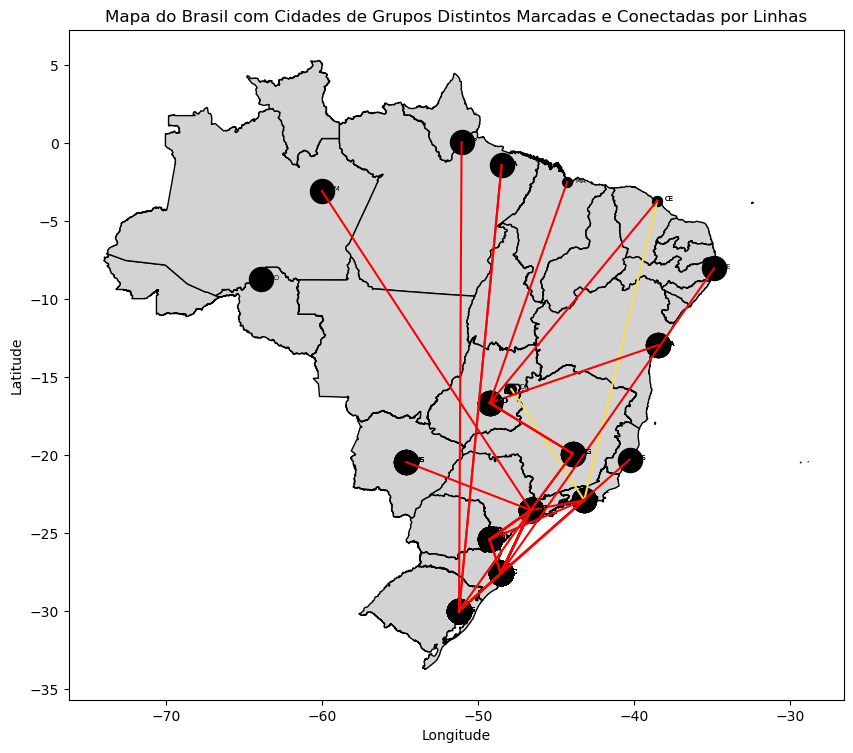

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geobr

# Carrega os dados dos estados do Brasil usando geobr
estados = geobr.read_state()

# Função para criar grupos de cidades a partir de uma sheet
def criar_grupo(sheet):
    grupo = {}
    for _, cidade_info in sheet.iterrows():
        cidade = cidade_info['Cidade']
        latitude = cidade_info['Latitude']
        longitude = cidade_info['Longitude']
        if cidade in grupo:
            # Se a cidade já existe no grupo, duplica o tamanho do ponto
            grupo[cidade] = (latitude, longitude, 300)
        else:
            grupo[cidade] = (latitude, longitude, 50)
    return grupo

# Inicializa o mapa do Brasil com as divisões estaduais
fig, ax = plt.subplots(figsize=(10, 12))
estados.plot(ax=ax, edgecolor='black', linewidth=1, facecolor='lightgray')

# Leitura do arquivo Excel e criação dos grupos de cidades para cada sheet
arquivo_excel = pd.ExcelFile('Tabela_MapaCadeiasTransmissao_V7_Completa.xlsx')
grupos_de_cidades = {}
for sheet_name in arquivo_excel.sheet_names:
    sheet = arquivo_excel.parse(sheet_name)
    grupos_de_cidades[sheet_name] = criar_grupo(sheet)

# Cores para os grupos
cores = {'purple': '#9F196B', 'yellow': '#FCDC4A', 'red': '#FF0000'}

# Marca as cidades por grupo com pontos pretos e conecta por linhas da mesma cor
for grupo, cidades in grupos_de_cidades.items():
    num_pacientes = len(cidades)
    cor = None
    if num_pacientes == 4:
        cor = cores['purple']
    elif num_pacientes == 3:
        cor = cores['yellow']
    elif num_pacientes == 2:
        cor = cores['red']

    for cidade, coordenadas in cidades.items():
        plt.scatter(float(coordenadas[1]), float(coordenadas[0]), color='black', s=coordenadas[2])
        plt.text(float(coordenadas[1]) + 0.5, float(coordenadas[0]), cidade, fontsize=5)
    
    for j in range(len(cidades) - 1):
        cidade1 = list(cidades.keys())[j]
        cidade2 = list(cidades.keys())[j + 1]
        coord1 = cidades[cidade1]
        coord2 = cidades[cidade2]
        plt.plot([float(coord1[1]), float(coord2[1])], [float(coord1[0]), float(coord2[0])], color=cor, linewidth=1.5, linestyle='-')

# Configurações adicionais
plt.title('Mapa do Brasil com Cidades de Grupos Distintos Marcadas e Conectadas por Linhas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#Salva a figura como svg
#plt.savefig('Mapa_Cadeia_Transmissao_HIV_Salvador_V1.svg', format='svg')

# Mostra o mapa
plt.show()

